In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
y_train.shape

(60000,)

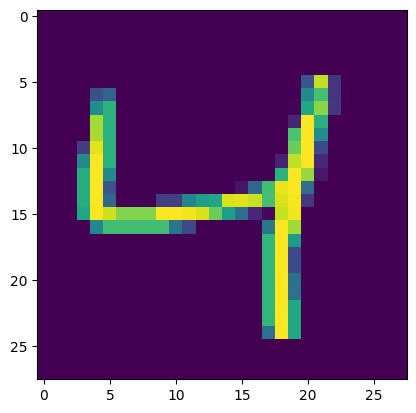

4


In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])
plt.show()
print(y_train[2])

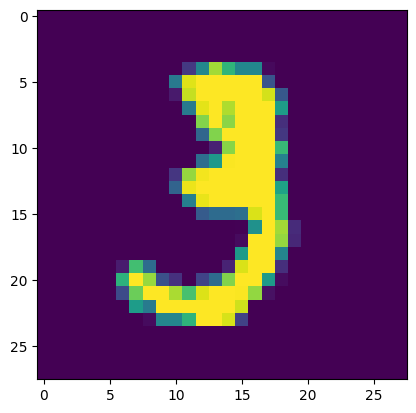

3


In [78]:
plt.imshow(X_train[10])
plt.show()
print(y_train[10])

In [6]:
#Make the values between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [19]:
print(X_train[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
#Implementing Convolutional Neural Network

from tensorflow.keras import models, layers

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))  #28*28 image size with 1 channel (Grayscale)
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(10,activation='softmax'))

In [14]:
#Compile CNN
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [15]:
#Train CNN

history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.2167 - accuracy: 0.9342 - val_loss: 0.0761 - val_accuracy: 0.9775
Epoch 2/10
1500/1500 [==============================] - 38s 26ms/step - loss: 0.0676 - accuracy: 0.9791 - val_loss: 0.0636 - val_accuracy: 0.9806
Epoch 3/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0508 - accuracy: 0.9847 - val_loss: 0.0561 - val_accuracy: 0.9828
Epoch 4/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0403 - accuracy: 0.9880 - val_loss: 0.0478 - val_accuracy: 0.9847
Epoch 5/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0339 - accuracy: 0.9895 - val_loss: 0.0461 - val_accuracy: 0.9871
Epoch 6/10
1500/1500 [==============================] - 31s 20ms/step - loss: 0.0282 - accuracy: 0.9909 - val_loss: 0.0427 - val_accuracy: 0.9872
Epoch 7/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0249 - accuracy: 0.9921 - val_loss: 0.0418 -

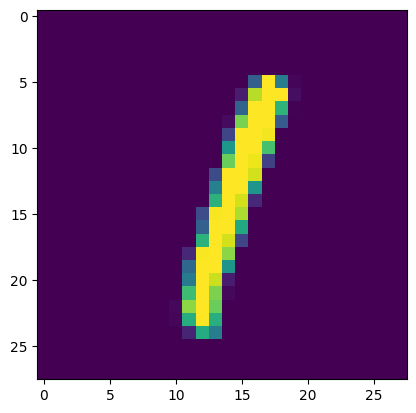

1


In [24]:
#Plot some test point
plt.imshow(X_test[5])
plt.show()
print(y_test[5])

In [22]:
#Model Prediction

Y_pred=model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


**It gives Probability of Each Data Point**

In [26]:
#Model Prediction value for y_test[5]=1
print(Y_pred[5])

[1.2632258e-08 9.9990040e-01 2.6756891e-07 2.3938971e-11 3.2947892e-06
 5.0229232e-10 4.7843898e-08 9.5186217e-05 6.7953636e-07 5.4267101e-08]


**Correct Pred value =1 and for correct prediction 1 should have the maximum probability**

In [30]:
#Convert probabilities into class labels

label_test=np.argmax(Y_pred[5])
print(label_test)

1


**Class (value) of images at each index**

In [32]:
# converting the prediction probabilities to class label for all test data points


Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [34]:
#Print confusion matrix

matrix = confusion_matrix(y_test, Y_pred_labels)
print(matrix)

tf.Tensor(
[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1126    2    3    1    0    1    0    2    0]
 [   2    0 1018    1    0    0    0    7    3    1]
 [   1    0    1 1006    0    2    0    0    0    0]
 [   0    0    1    0  974    0    1    1    0    5]
 [   1    0    0    6    0  881    1    1    1    1]
 [   3    2    1    0    3    3  945    0    1    0]
 [   0    1    3    0    0    1    0 1021    1    1]
 [   3    0    1    3    0    1    0    0  963    3]
 [   1    0    0    0    4    2    0    5    2  995]], shape=(10, 10), dtype=int32)


Text(158.22222222222223, 0.5, 'True Labels')

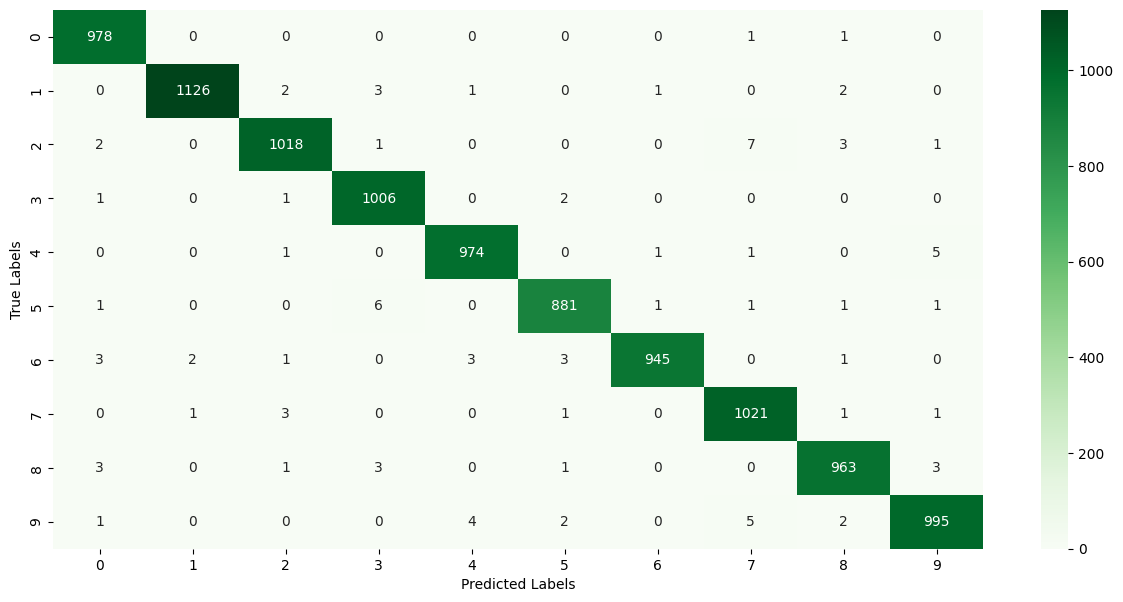

In [42]:
#Plotting confusion matrix using seaborn heatmap

plt.figure(figsize=(15,7))
sns.heatmap(matrix,annot=True,fmt='d',cmap='Greens') #d->integer
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")



**In above matrix, Diagonals=correct prediction**   
**978 images with label 0 is correctly predicted as 0**

**Other than Diagonal= incorrect prediction**

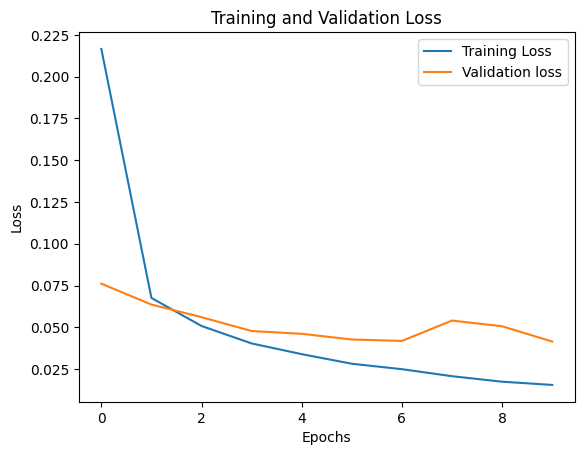

In [38]:
#Plot
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

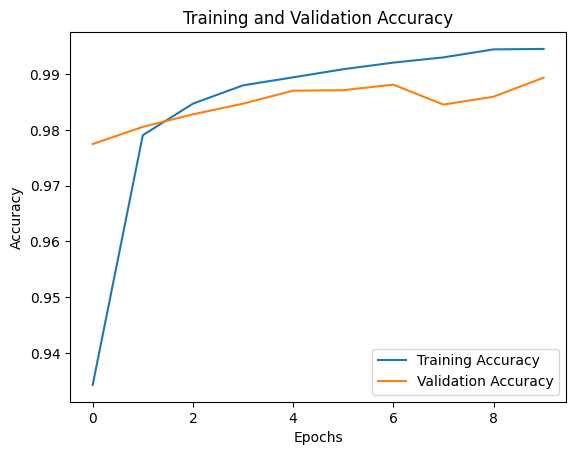

In [39]:
#Plot

plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

**Prediction for new image**




In [63]:
input_path='/content/Test_image2.png'

In [64]:
input_img=cv2.imread(input_path)

In [65]:
type(input_img)

numpy.ndarray

In [66]:
print(input_img)

[[[143 143 143]
  [110 110 110]
  [113 113 113]
  ...
  [113 113 113]
  [ 95  95  95]
  [195 195 195]]

 [[110 110 110]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [182 182 182]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 ...

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]]


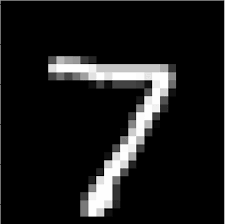

In [67]:
cv2_imshow(input_img)

In [68]:
input_img.shape  #Colour image , channel=3, 224*225

(224, 225, 3)

In [69]:
input_img=cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)       #convert RGB to grayscale

In [70]:
input_img.shape

(224, 225)

In [71]:
#Resize image to 28*28

input_img=cv2.resize(input_img,(28,28))



In [72]:
input_img.shape

(28, 28)

In [73]:
cv2_imshow(input_img)

In [74]:
#Value 0 to 1

input_img=input_img/255

In [75]:
#Reshape

input_img=np.reshape(input_img,[1,28,28])   #for 1 image of size 28*28  for RGB-> [1,28,28,3]

In [76]:
#Prediction
prediction=model.predict(input_img)
print(prediction)

1/1 [==============================] - 0s 36ms/step
[[3.7784164e-12 3.3859710e-11 1.0005609e-07 6.1284631e-08 2.6344387e-14
  3.8371150e-11 9.8213849e-20 9.9999976e-01 1.6925365e-10 8.5999732e-09]]


In [77]:
label_input=np.argmax(prediction)
print(label_input)

7


**Correctly Predicted as 7 😎**